In [177]:
# Import modules
import pandas
from datetime import datetime
from collections import defaultdict
from imdb import IMDb
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
#from pandas import read_csv

ia = IMDb()

# Reading in the data into a pandas dataframe
# Data from https://www.kaggle.com/mitesh58/bollywood-movie-dataset/version/4#
df = pandas.read_csv("./BollywoodMovieDetail.csv")

# Display the data
df


ModuleNotFoundError: No module named 'seaborn'

In [5]:
ia = IMDb()

# Getting additional information from imdb
ratings = []
votes = []
runtimes = []

# This will take a while
for idx, row in df.iterrows():
    print("Progress {:2.1%}".format(idx / df.shape[0]), end="\r")
    imdbid = str(row["imdbId"])[2:]
    movie = ia.get_movie(imdbid)
    ratings.append(movie.get("rating"))
    votes.append(movie.get("votes"))
    runtimes.append(movie.get("runtimes"))
    
# Add our new information to our dataframe
df["rating"] = ratings
df["votes"] = votes
df["runtimes"] = runtimes

# View our new dataframe
df


# Save our df so we don't have to keep running this
df.to_csv("our_data.csv")
    

KeyboardInterrupt: 

In [24]:
ia = IMDb()
movie = ia.get_movie("3881136")
movie.keys()

['cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'directors',
 'writers',
 'producers',
 'composers',
 'cinematographers',
 'editors',
 'editorial department',
 'sound department',
 'visual effects',
 'music department',
 'miscellaneous',
 'akas',
 'writer',
 'director',
 'production companies',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']

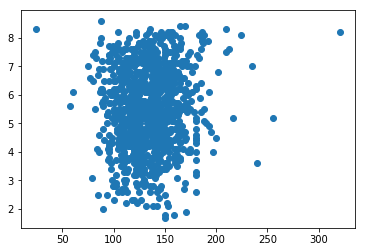

In [10]:
df = pandas.read_csv("our_data.csv")
df["runtimes"] = pandas.to_numeric(df["runtimes"])
df["votes"] = pandas.to_numeric(df["votes"])
df["rating"] = pandas.to_numeric(df["rating"])
plt.scatter(df["runtimes"], df["rating"])

<Figure size 576x576 with 0 Axes>

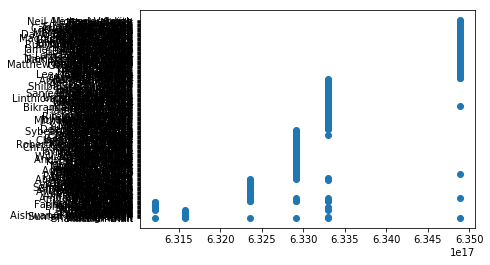

<Figure size 576x576 with 0 Axes>

In [87]:
def ticks(dt):
    return (dt - datetime(1, 1, 1)).total_seconds() * 10000000

ia = IMDb()
movie_id = ["0222024", "0227194", "0420332", "0449999", "1024943", "2176013"]
actor_dict = defaultdict(list)
actor_id_to_name = defaultdict()
for m in movie_id:
    movie = ia.get_movie(m)
    # parse out date data and turn it into a dateTime object
    date_str = movie["original air date"]
    date = datetime.strptime((movie["original air date"])[:11],"%d %b %Y")
    for p in movie["cast"]:
        #print("Name: " + p["name"] + " ID: " + p.personID + " movie year: " + date)
        actor_dict[p["name"]].append(ticks(date))
        actor_id_to_name[p.personID] = p["name"]

xs, ys=zip(*((int(x), k) for k in actor_dict for x in actor_dict[k]))

plt.scatter(xs, ys)
plt.figure(figsize=(8,8))
#plt.scatter(list(actor_dict.values()), list(actor_dict.keys()))
#plt.xticks(range(len(actor_dict)), list(actor_dict.values()))

In [168]:
def ticks(dt):
    return (dt - datetime(1, 1, 1)).total_seconds() * 10000000

ia = IMDb()
actor_data = pandas.DataFrame()

ActorName = [] # string
ActorID = [] # int
MovieName = [] #string
MovieRating = [] # float
MoviePopularity = [] # int
ReleaseDate = [] # ticsk since year 0

movie_id = ["0222024", "0227194", "0420332", "0449999", "1024943", "2176013", "1187043", "1188996", "1869296", "0473310"]

for m in movie_id:
    # get movie object
    movie = ia.get_movie(m)
    
    # parse out date data and turn it into a dateTime object
    date_str = movie["original air date"]
    date = datetime.strptime((movie["original air date"])[:11],"%d %b %Y")
    
    for p in movie["cast"]:
        ActorName.append(p["name"])
        ActorID.append(p.personID)
        MovieName.append(movie["title"])
        MovieRating.append(movie["rating"])
        MoviePopularity.append(movie["votes"])
        ReleaseDate.append(ticks(date))
        
actor_data["ActorName"] = ActorName
actor_data["ActorID"] = ActorID
actor_data["MovieName"] = MovieName
actor_data["MovieRating"] = MovieRating
actor_data["MoviePopularity"] = MoviePopularity
actor_data["ReleaseDate"] = ReleaseDate

# Gets the top 10 actors with the most movies
movies_per_actor = actor_data["ActorName"].value_counts().head(10)
display(movies_per_actor)

Shah Rukh Khan       7
Amitabh Bachchan     5
Kiron Kher           3
Abhishek Bachchan    3
Preity Zinta         3
Rani Mukerji         3
Kajol                3
Shawar Ali           2
Rishi Kapoor         2
Kareena Kapoor       2
Name: ActorName, dtype: int64

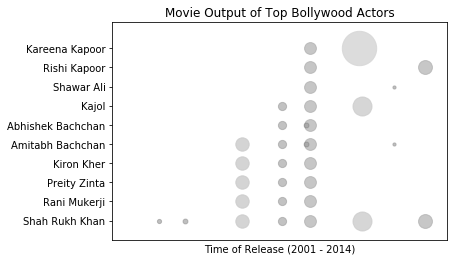

In [227]:
# Get list of names of the top actors
top_actors = list(movies_per_actor.keys())
#plt.yticks(range(len(top_actors)), top_actors)

# go through all data
for i in range(actor_data["ActorName"].count()):
    name = actor_data["ActorName"][i]
    # only plot if in top actors list
    if name in top_actors:
        plt.scatter(actor_data["ReleaseDate"][i], name, s=actor_data["MoviePopularity"][i]/250, alpha=(actor_data["MovieRating"][i]/10), c=str(float(actor_data["MovieRating"][i]/10)))

plt.xticks([])
plt.xlabel('Time of Release (2001 - 2014)')
plt.title('Movie Output of Top Bollywood Actors')
plt.show()